# MetOffice Historic Stations Data

In [1]:
#%matplotlib inline 
# this line is required for the plots to appear in the Jupyter cells, rather than launching the matplotlib GUI
%matplotlib notebook
#this allows interactive view but you need to be in classic rather than CoCalc Jupyter notebook for this to work

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import warnings


# Let printing work the same in Python 2 and 3
from __future__ import division,print_function

# notice two underscores _ either side of future

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
=== Linear Fit Results for March Rainfall ===
Slope (m): -0.0177 ± 0.1411
Intercept (c): 95.69 ± 279.89


<IPython.core.display.Javascript object>


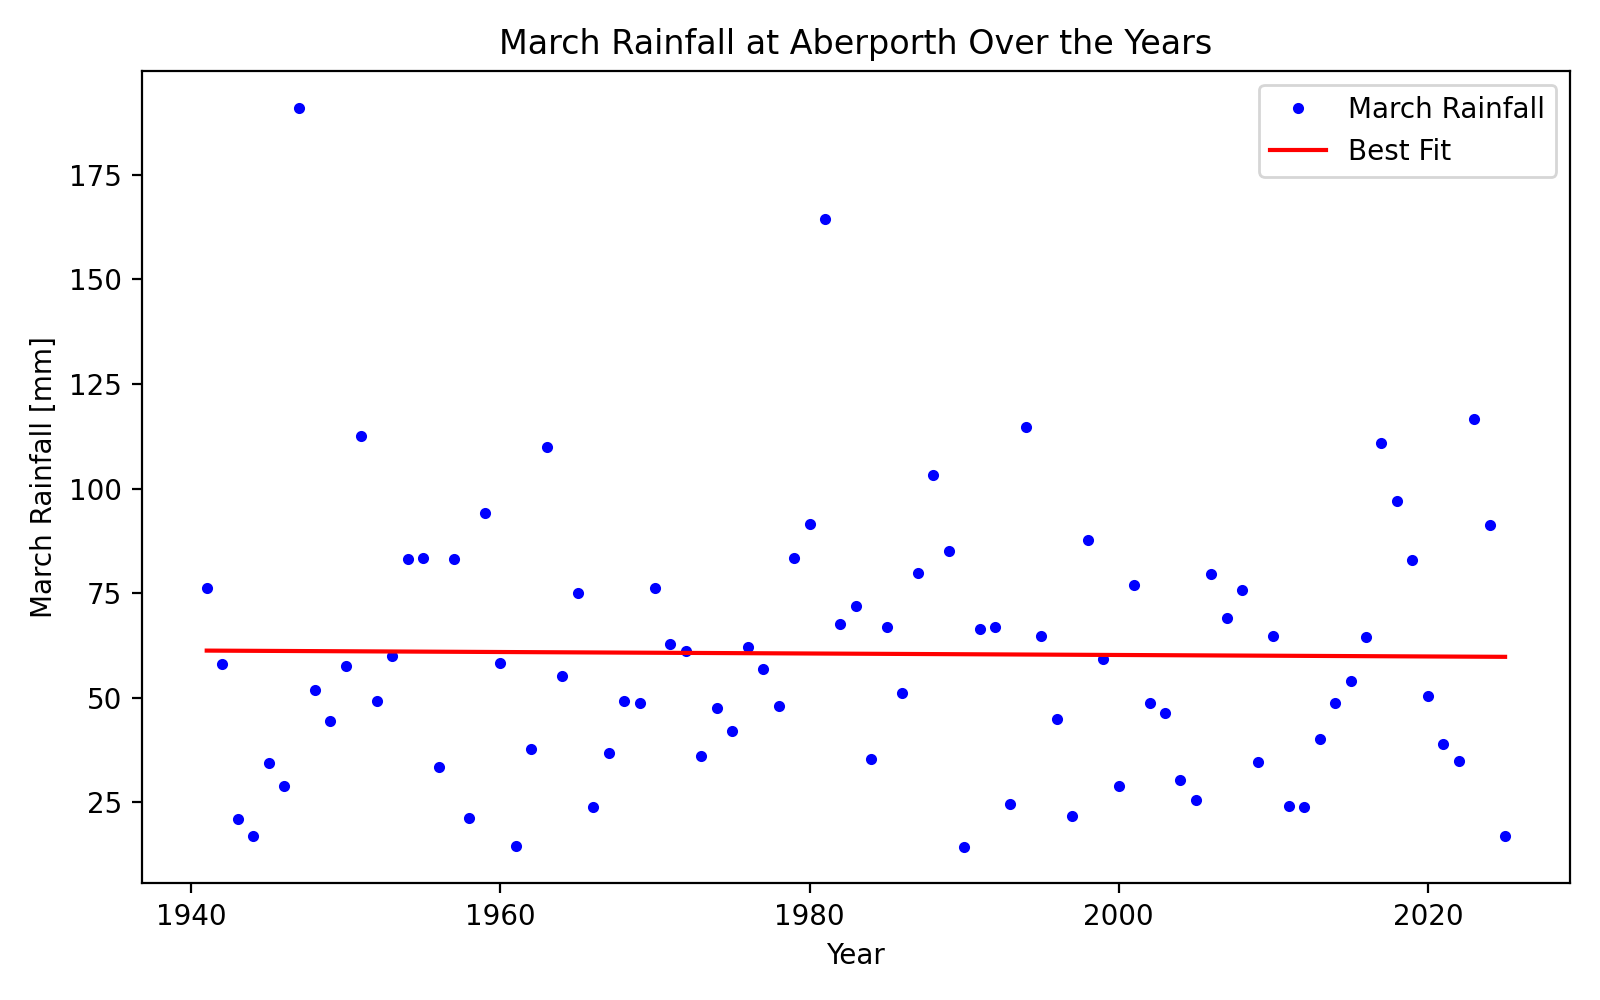

In [2]:
#this loads the entire data file, skipping the first 7 lines which are headers
data = np.genfromtxt('aberporthdata.txt',
                     skip_header=7,
                     dtype=float,
                     missing_values='---',
                     filling_values=np.nan)

#extracts relevent columns 
year = data[:, 0]
month = data[:, 1]
rain = data[:, 5]  

#creates a mask (True/False array) that selects only March rows (month == 3)
march_mask = month == 3
march_years = year[march_mask]
march_rain = rain[march_mask]

#creates a second mask to remove any entries where rainfall is NaN (missing)
valid = ~np.isnan(march_rain)
march_years = march_years[valid]
march_rain = march_rain[valid]

#checks to make sure there is only one march entry per year 
assert len(march_years) == len(set(march_years)), "Duplicate years found!"


(coefs, cov) = np.polyfit(march_years, march_rain, 1, cov=True)
m, c = coefs  
m_err, c_err = np.sqrt(np.diag(cov))  

print("=== Linear Fit Results for March Rainfall ===")
print(f"Slope (m): {m:.4f} ± {m_err:.4f}")
print(f"Intercept (c): {c:.2f} ± {c_err:.2f}")

#line of best fit 
fit_line = m * march_years + c

plt.figure(figsize=(8, 5))
plt.plot(march_years, march_rain, 'b.', label='March Rainfall')
plt.plot(march_years, fit_line, 'r-', label='Best Fit')
plt.xlabel('Year')
plt.ylabel('March Rainfall [mm]')
plt.title('March Rainfall at Aberporth Over the Years')
plt.legend()
plt.tight_layout()
plt.show()

=== Linear Fit Results for March Sunshine ===Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Slope     (m):  -0.0986 ± 0.1408   [hours/year]
Intercept (c):   319.54 ± 279.21   [hours]


<IPython.core.display.Javascript object>


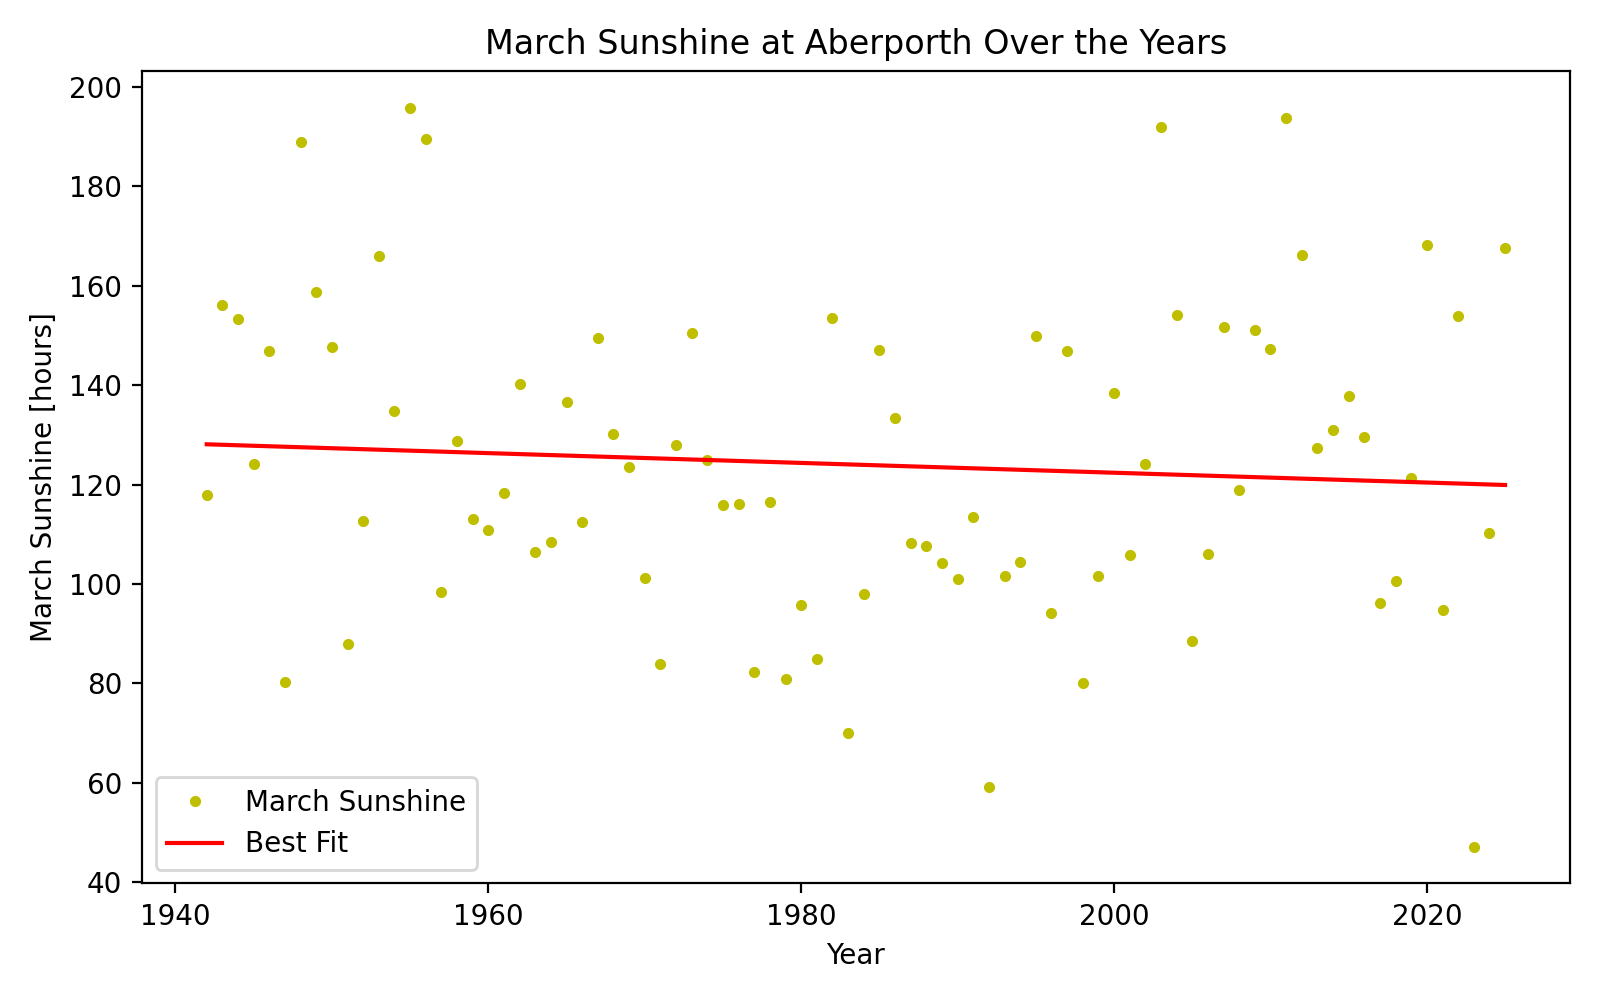

In [3]:
data = np.genfromtxt('aberporthdata.txt',
                     skip_header=7,
                     dtype=float,
                     missing_values='---',     
                     filling_values=np.nan)    


year = data[:, 0]       
month = data[:, 1]      
sun = data[:, 6]        


march_mask = month == 3
march_years = year[march_mask]
march_sun = sun[march_mask]


valid = ~np.isnan(march_sun)
march_years = march_years[valid]
march_sun = march_sun[valid]


(coefs, cov) = np.polyfit(march_years, march_sun, 1, cov=True)
m, c = coefs                      
m_err, c_err = np.sqrt(np.diag(cov))  


print("=== Linear Fit Results for March Sunshine ===")
print(f"Slope     (m): {m:8.4f} ± {m_err:.4f}   [hours/year]")
print(f"Intercept (c): {c:8.2f} ± {c_err:.2f}   [hours]")

fit_line = m * march_years + c


plt.figure(figsize=(8, 5))
plt.plot(march_years, march_sun, 'y.', label='March Sunshine')    
plt.plot(march_years, fit_line, 'r-', label='Best Fit')            
plt.xlabel('Year')
plt.ylabel('March Sunshine [hours]')
plt.title('March Sunshine at Aberporth Over the Years')
plt.legend()
plt.tight_layout()
plt.show()


=== Linear Fit: Average Spring Rainfall ===Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Slope     (m): 0.0757 ± 0.0560   [mm/year]
Intercept (c): 23.31 ± 108.55   [mm]


<IPython.core.display.Javascript object>


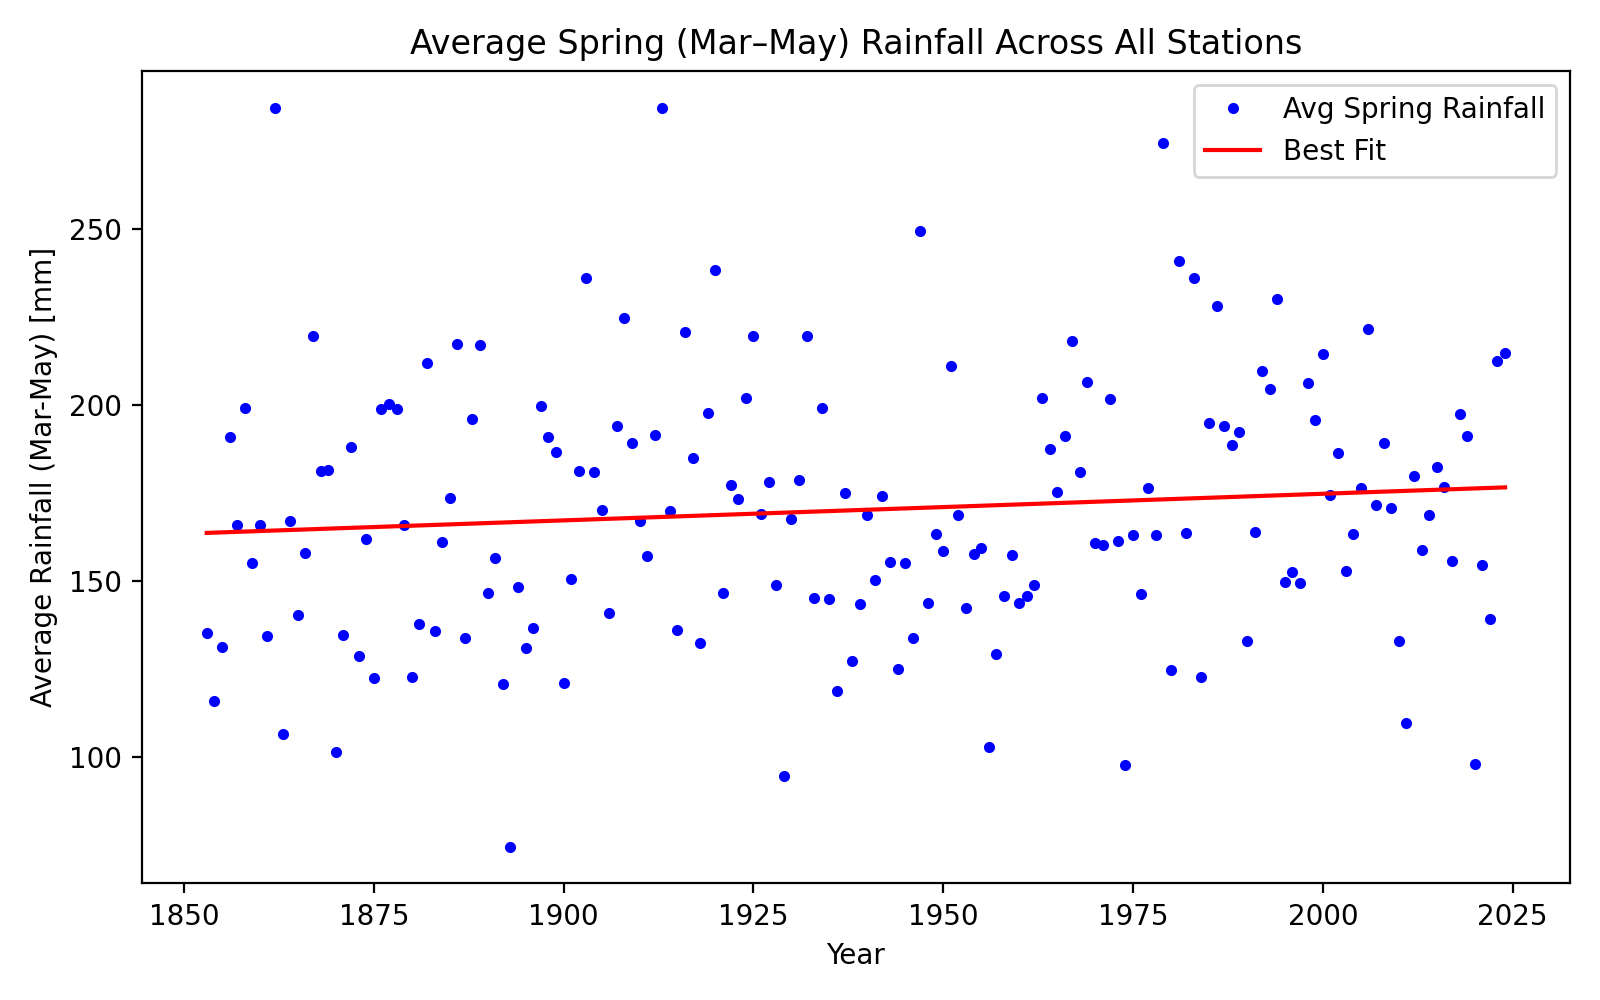

In [4]:
#function to load a file safely, line by line 
def load_clean_data(filename):
    rows = []
    with open(filename, 'r') as f:
        reader = csv.reader(f, delimiter=' ', skipinitialspace=True)  
        for i, row in enumerate(reader):
            if i < 7:
                continue  
            row = [cell for cell in row if cell]  
            if len(row) == 7: 
                try:
                    cleaned = [float(x) if x != '---' else np.nan for x in row]
                    rows.append(cleaned)
                except ValueError:
                    continue  
    return np.array(rows)


file_list = [f for f in os.listdir('.') if f.endswith('.txt')]


rain_by_year = {}


for filename in file_list:
    try:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=UserWarning)
            data = load_clean_data(filename)

        if data.shape[1] != 7:
            print(f"Skipping {filename}: unexpected shape {data.shape}")
            continue

        year = data[:, 0]
        month = data[:, 1]
        rain = data[:, 5]

        mask = (month >= 3) & (month <= 5)
        year = year[mask]
        rain = rain[mask]

        valid = ~np.isnan(rain)
        year = year[valid]
        rain = rain[valid]


        for y in np.unique(year):
            spring_rain = np.sum(rain[year == y])
            rain_by_year.setdefault(y, []).append(spring_rain)

    except Exception as e:
        print(f"Failed to process {filename}: {e}")


common_years = sorted(rain_by_year.keys())
avg_rain = np.array([np.mean(rain_by_year[y]) for y in common_years])
common_years = np.array(common_years)


(coefs, cov) = np.polyfit(common_years, avg_rain, 1, cov=True)
m, c = coefs
m_err, c_err = np.sqrt(np.diag(cov))
fit_line = m * common_years + c


print("=== Linear Fit: Average Spring Rainfall ===")
print(f"Slope     (m): {m:.4f} ± {m_err:.4f}   [mm/year]")
print(f"Intercept (c): {c:.2f} ± {c_err:.2f}   [mm]")


plt.figure(figsize=(8, 5))
plt.plot(common_years, avg_rain, 'b.', label='Avg Spring Rainfall')
plt.plot(common_years, fit_line, 'r-', label=f'Best Fit')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (Mar-May) [mm]')
plt.title('Average Spring (Mar–May) Rainfall Across All Stations')
plt.legend()
plt.tight_layout()
plt.show()


=== Linear Fit: Average Spring Sunshine ===Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Slope     (m): -0.0400 ± 0.1242   [hours/year]
Intercept (c): 523.19 ± 243.08   [hours]


<IPython.core.display.Javascript object>


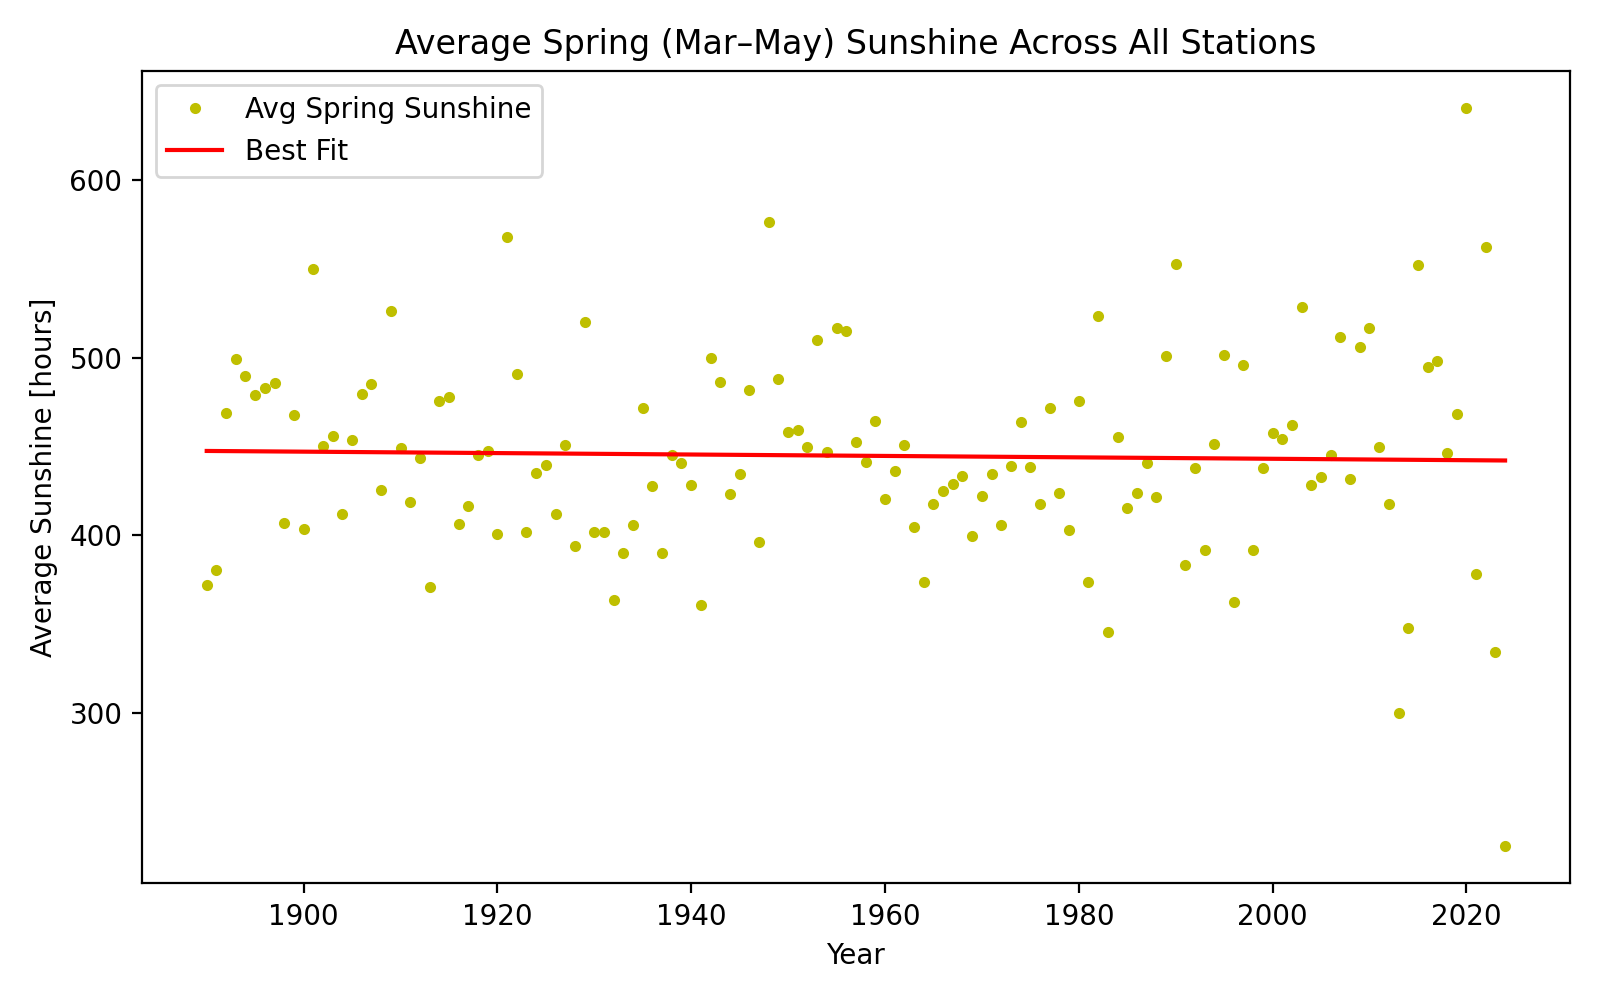

In [5]:
def load_clean_data(filename):
    rows = []
    with open(filename, 'r') as f:
        reader = csv.reader(f, delimiter=' ', skipinitialspace=True)
        for i, row in enumerate(reader):
            if i < 7:
                continue 
            row = [cell for cell in row if cell]  
            if len(row) == 7:
                try:
                    cleaned = [float(x) if x != '---' else np.nan for x in row]
                    rows.append(cleaned)
                except ValueError:
                    continue  
    return np.array(rows)


file_list = [f for f in os.listdir('.') if f.endswith('.txt')]


sun_by_year = {}


for filename in file_list:
    try:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=UserWarning)
            data = load_clean_data(filename)

        if data.shape[1] != 7:
            print(f"Skipping {filename}: unexpected shape {data.shape}")
            continue

        year = data[:, 0]
        month = data[:, 1]
        sun = data[:, 6]  

        
        mask = (month >= 3) & (month <= 5)
        year = year[mask]
        sun = sun[mask]

        
        valid = ~np.isnan(sun)
        year = year[valid]
        sun = sun[valid]

        
        for y in np.unique(year):
            spring_sun = np.sum(sun[year == y])
            sun_by_year.setdefault(y, []).append(spring_sun)

    except Exception as e:
        print(f"Failed to process {filename}: {e}")


common_years = sorted(sun_by_year.keys())
avg_sun = np.array([np.mean(sun_by_year[y]) for y in common_years])
common_years = np.array(common_years)


(coefs, cov) = np.polyfit(common_years, avg_sun, 1, cov=True)
m, c = coefs
m_err, c_err = np.sqrt(np.diag(cov))
fit_line = m * common_years + c


print("=== Linear Fit: Average Spring Sunshine ===")
print(f"Slope     (m): {m:.4f} ± {m_err:.4f}   [hours/year]")
print(f"Intercept (c): {c:.2f} ± {c_err:.2f}   [hours]")


plt.figure(figsize=(8, 5))
plt.plot(common_years, avg_sun, 'y.', linestyle='None', label='Avg Spring Sunshine')
plt.plot(common_years, fit_line, 'r-', label=f'Best Fit')
plt.xlabel('Year')
plt.ylabel('Average Sunshine [hours]')
plt.title('Average Spring (Mar–May) Sunshine Across All Stations')
plt.legend()
plt.tight_layout()
plt.show()



Average spring rainfall in 2025: 103.4 mm


<IPython.core.display.Javascript object>


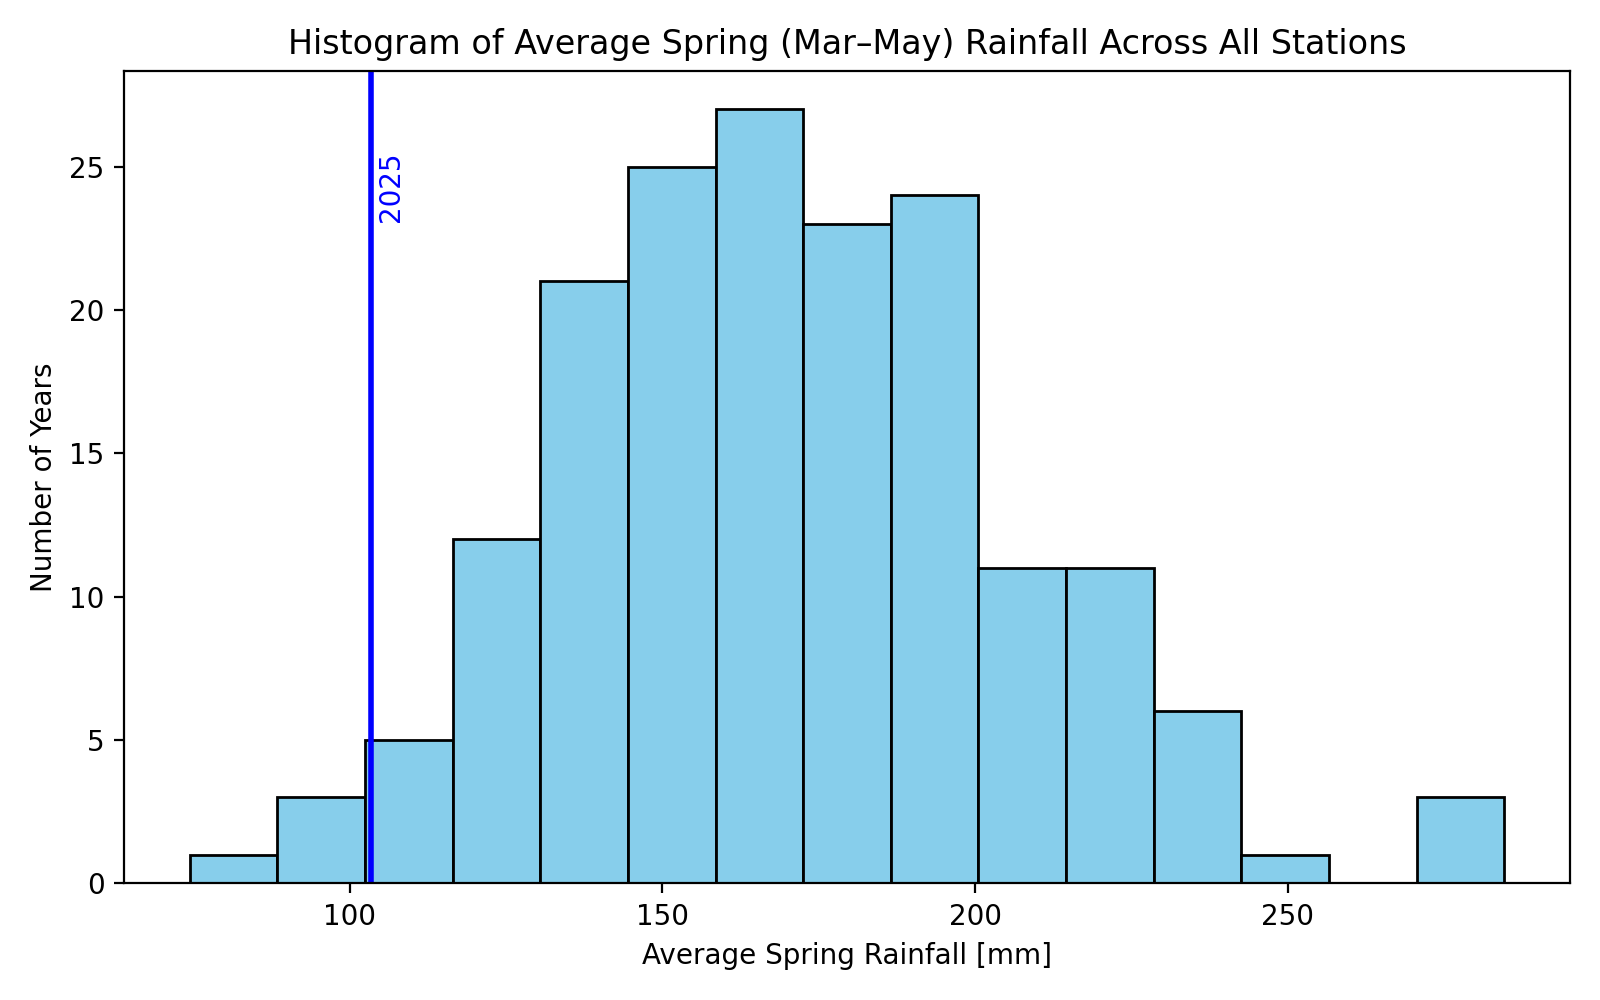

In [6]:
def load_clean_data(filename):
    rows = []
    with open(filename, 'r') as f:
        for i, line in enumerate(f):
            if i < 7:
                continue  
            line = line.split('#')[0].strip()  
            if not line:
                continue
            parts = line.split()
            if len(parts) == 7:
                try:
                    row = [float(x) if x != '---' else np.nan for x in parts]
                    rows.append(row)
                except ValueError:
                    continue
    return np.array(rows)


file_list = [f for f in os.listdir('.') if f.endswith('.txt')]

rain_by_year = {}
rain_2025_list = []

for filename in file_list:
    try:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=UserWarning)
            data = load_clean_data(filename)

        if data.ndim != 2 or data.shape[1] != 7:
            continue  

        year = data[:, 0]
        month = data[:, 1]
        rain = data[:, 5]

        
        spring_mask = (month >= 3) & (month <= 5)
        year_spring = year[spring_mask]
        rain_spring = rain[spring_mask]

        
        valid = ~np.isnan(rain_spring)
        year_spring = year_spring[valid]
        rain_spring = rain_spring[valid]

        
        for y in np.unique(year_spring):
            y_mask = np.isclose(year_spring, y)
            total = np.sum(rain_spring[y_mask])
            rain_by_year.setdefault(int(y), []).append(total)

       
        if np.any(np.isclose(year_spring, 2025)):
            r2025 = np.sum(rain_spring[np.isclose(year_spring, 2025)])
            rain_2025_list.append(r2025)

    except Exception:
        continue  


common_years = sorted(rain_by_year.keys())
avg_rain = np.array([np.mean(rain_by_year[y]) for y in common_years])
common_years = np.array(common_years)


highlight = False
if len(rain_2025_list) > 0:
    avg_rain_2025 = np.mean(rain_2025_list)
    highlight = True
    
    print(f"\nAverage spring rainfall in 2025: {avg_rain_2025:.1f} mm")
else:
    highlight = False


plt.figure(figsize=(8, 5))
plt.hist(avg_rain, bins=15, color='skyblue', edgecolor='black')
plt.xlabel('Average Spring Rainfall [mm]')
plt.ylabel('Number of Years')
plt.title('Histogram of Average Spring (Mar–May) Rainfall Across All Stations')

if highlight:
    plt.axvline(avg_rain_2025, color='b', linestyle='-', linewidth=2)
    plt.text(avg_rain_2025 + 1,
             plt.ylim()[1] * 0.9,
             f'2025',
             color='b',
             rotation=90,
             va='top',
             ha='left',
             fontsize=10)

plt.tight_layout()
plt.show()


Average spring sunshine in 2025: 601.8 hours


<IPython.core.display.Javascript object>


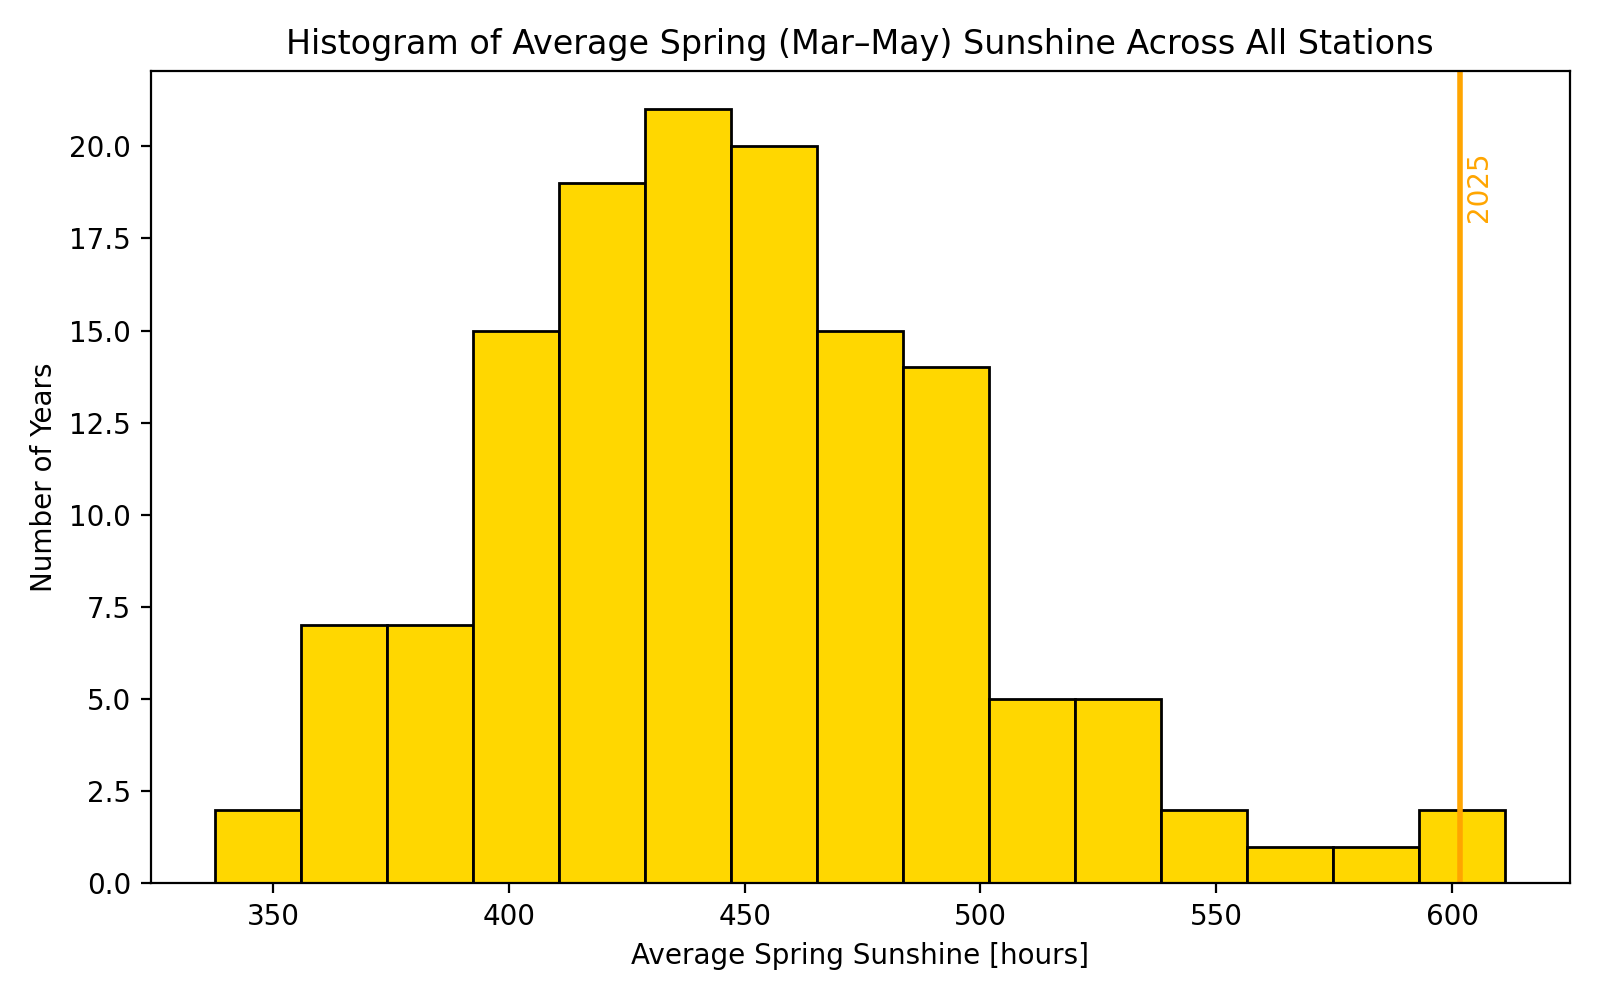

In [7]:
def load_clean_data(filename):
    rows = []
    with open(filename, 'r') as f:
        for i, line in enumerate(f):
            if i < 7:
                continue  
            line = line.split('#')[0].strip() 
            if not line:
                continue
            parts = line.split()
            if len(parts) == 7:
                try:
                    row = [float(x) if x != '---' else np.nan for x in parts]
                    rows.append(row)
                except ValueError:
                    continue
    return np.array(rows)


file_list = [f for f in os.listdir('.') if f.endswith('.txt')]

sun_by_year = {}
sun_2025_list = []

for filename in file_list:
    try:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=UserWarning)
            data = load_clean_data(filename)

        if data.ndim != 2 or data.shape[1] != 7:
            continue

        year = data[:, 0]
        month = data[:, 1]
        sun = data[:, 6]  

       
        spring_mask = (month >= 3) & (month <= 5)
        year_spring = year[spring_mask]
        sun_spring = sun[spring_mask]

        valid = ~np.isnan(sun_spring)
        year_spring = year_spring[valid]
        sun_spring = sun_spring[valid]

        for y in np.unique(year_spring):
            y_mask = np.isclose(year_spring, y)
            total = np.sum(sun_spring[y_mask])
            sun_by_year.setdefault(int(y), []).append(total)

        if np.any(np.isclose(year_spring, 2025)):
            s2025 = np.sum(sun_spring[np.isclose(year_spring, 2025)])
            sun_2025_list.append(s2025)

    except Exception:
        continue


common_years = sorted(sun_by_year.keys())
avg_sun = np.array([np.mean(sun_by_year[y]) for y in common_years])
common_years = np.array(common_years)

highlight = False
if len(sun_2025_list) > 0:
    avg_sun_2025 = np.mean(sun_2025_list)
    highlight = True
    print(f"\nAverage spring sunshine in 2025: {avg_sun_2025:.1f} hours")


plt.figure(figsize=(8, 5))
plt.hist(avg_sun, bins=15, color='gold', edgecolor='black')
plt.xlabel('Average Spring Sunshine [hours]')
plt.ylabel('Number of Years')
plt.title('Histogram of Average Spring (Mar–May) Sunshine Across All Stations')

if highlight:
    plt.axvline(avg_sun_2025, color='orange', linestyle='-', linewidth=2)
    plt.text(avg_sun_2025 + 1,
             plt.ylim()[1] * 0.9,
             f'2025',
             color='orange',
             rotation=90,
             va='top',
             ha='left',
             fontsize=10)

plt.tight_layout()
plt.show()